In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy.stats import ttest_ind

In [2]:
data = pd.read_csv("/Users/judet/Downloads/Data Analytics/Movie_Industry_Analysis/movies.csv")

In [3]:
print(data.columns)

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')


# 🎯 Descriptive Analysis

## What are the top 10 highest-grossing movies in the dataset?

In [4]:
top10_gross = data.sort_values(by="gross", ascending=False).head(10)[["name", "year", "gross"]]

print("Top 10 Highest-Grossing Movies:")
print(top10_gross.to_string(index=False))

Top 10 Highest-Grossing Movies:
                                      name  year        gross
                                    Avatar  2009 2847246203.0
                         Avengers: Endgame  2019 2797501328.0
                                   Titanic  1997 2201647264.0
Star Wars: Episode VII - The Force Awakens  2015 2069521700.0
                    Avengers: Infinity War  2018 2048359754.0
                             The Lion King  2019 1670727580.0
                            Jurassic World  2015 1670516444.0
                              The Avengers  2012 1518815515.0
                                 Furious 7  2015 1515341399.0
                                 Frozen II  2019 1450026933.0


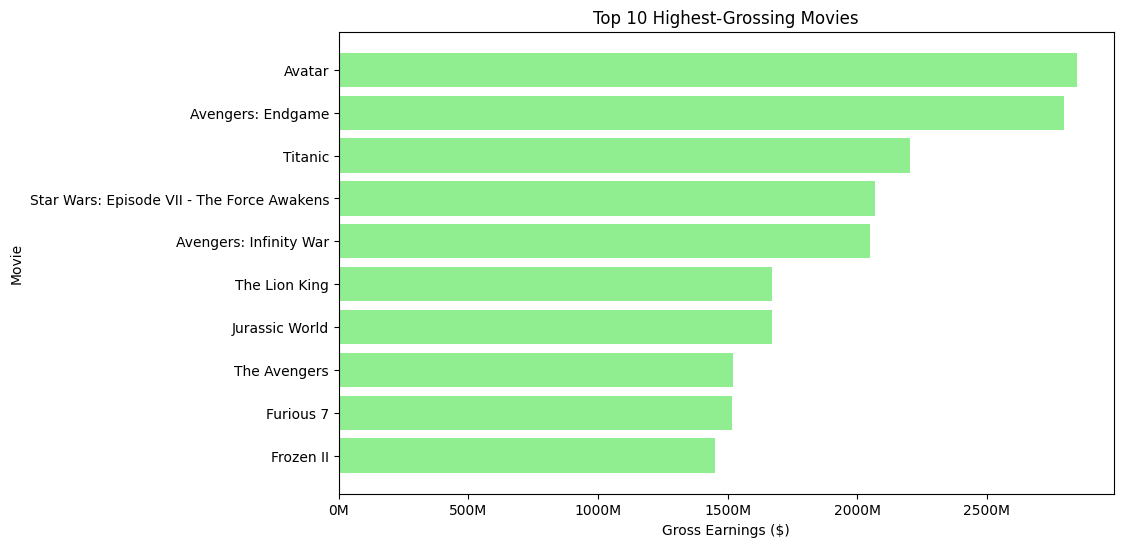

In [5]:
plt.figure(figsize=(10,6))
bars = plt.barh(top10_gross["name"], top10_gross["gross"], color="lightgreen")

# Add labels and title
plt.xlabel("Gross Earnings ($)")
plt.ylabel("Movie")
plt.title("Top 10 Highest-Grossing Movies")

# Format x-axis labels in millions
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1_000_000)}M'))

# Invert y-axis so highest grossing is on top
plt.gca().invert_yaxis()

plt.show()

## What is the average runtime of movies per genre?

In [6]:
avg_runtime_per_genre = data.groupby("genre")["runtime"].mean().sort_values(ascending=False)
print("Average Runtime per Genre:")
print(avg_runtime_per_genre)

Average Runtime per Genre:
genre
Musical      145.000000
Biography    119.880361
Music        117.000000
Mystery      115.750000
Drama        112.974934
Crime        111.752727
Action       110.211268
Adventure    107.978923
Romance      106.600000
Comedy       101.491759
Sci-Fi       100.300000
Family        99.909091
Fantasy       99.363636
Thriller      98.625000
Western       97.333333
Horror        96.304348
Sport         94.000000
Animation     92.204142
History       55.000000
Name: runtime, dtype: float64


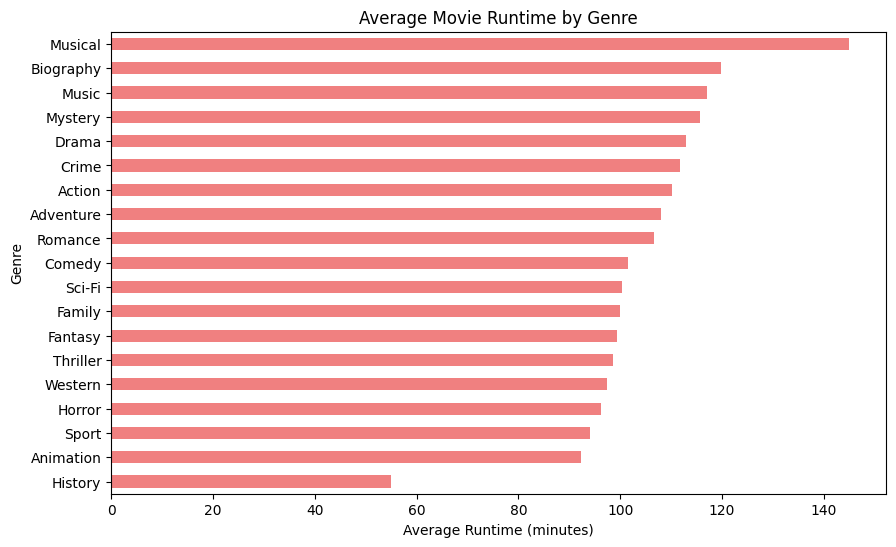

In [7]:
avg_runtime_per_genre.plot(kind="barh", figsize=(10, 6), color="lightcoral")

plt.xlabel("Average Runtime (minutes)")
plt.ylabel("Genre")
plt.title("Average Movie Runtime by Genre")
plt.gca().invert_yaxis() # longest runtime at the top

plt.show()

## Which directors have the highest average movie score?

In [8]:
highest_avg_movie_score_director = data.groupby("director")["score"].mean().sort_values(ascending=False)
highest_avg_movie_score_director = highest_avg_movie_score_director.head(20)
highest_avg_movie_score_director = highest_avg_movie_score_director.reset_index() # make it a DataFrame again
 
print("Top 20 Directors with the highest average movie score:")
print(highest_avg_movie_score_director.to_string(index=True))

Top 20 Directors with the highest average movie score:
                 director  score
0         Olivier Nakache   8.50
1          Anurag Kashyap   8.50
2   Marco Tullio Giordana   8.50
3              Aamir Khan   8.40
4            Sergio Leone   8.40
5         Bob Persichetti   8.40
6           Nadine Labaki   8.40
7           Nitesh Tiwari   8.35
8         Tengiz Abuladze   8.30
9         Moustapha Akkad   8.30
10              Tom Logan   8.30
11            Lee Unkrich   8.30
12        Rajkumar Hirani   8.25
13           Majid Majidi   8.25
14         Jerry Mitchell   8.20
15   Vikramaditya Motwane   8.20
16        Sriram Raghavan   8.20
17   Juan José Campanella   8.20
18              Béla Tarr   8.20
19        Nishikant Kamat   8.20


# 📈 Trends & Patterns

## How has the average movie budget changed over the years?

In [9]:
avg_budget_per_year = (
    data.groupby("year")["budget"]
    .mean()
    .reset_index()
    .sort_values("year")
)

print("Average Movie Budget per Year:")
print(avg_budget_per_year.to_string(index=False))

Average Movie Budget per Year:
 year       budget
 1980 1.210319e+07
 1981 1.043309e+07
 1982 1.130635e+07
 1983 1.004467e+07
 1984 1.226732e+07
 1985 1.245418e+07
 1986 1.252265e+07
 1987 1.280132e+07
 1988 1.301158e+07
 1989 1.499800e+07
 1990 1.834073e+07
 1991 1.955386e+07
 1992 1.976401e+07
 1993 1.864826e+07
 1994 2.519732e+07
 1995 2.550240e+07
 1996 2.878181e+07
 1997 3.504097e+07
 1998 3.665950e+07
 1999 4.111549e+07
 2000 3.889724e+07
 2001 3.883313e+07
 2002 3.662213e+07
 2003 4.149956e+07
 2004 4.428688e+07
 2005 4.229114e+07
 2006 4.363841e+07
 2007 4.500325e+07
 2008 4.352750e+07
 2009 4.399123e+07
 2010 4.666311e+07
 2011 4.917956e+07
 2012 4.771347e+07
 2013 5.032093e+07
 2014 4.573190e+07
 2015 4.668233e+07
 2016 5.526101e+07
 2017 5.571203e+07
 2018 4.904182e+07
 2019 5.740129e+07
 2020 5.753105e+07


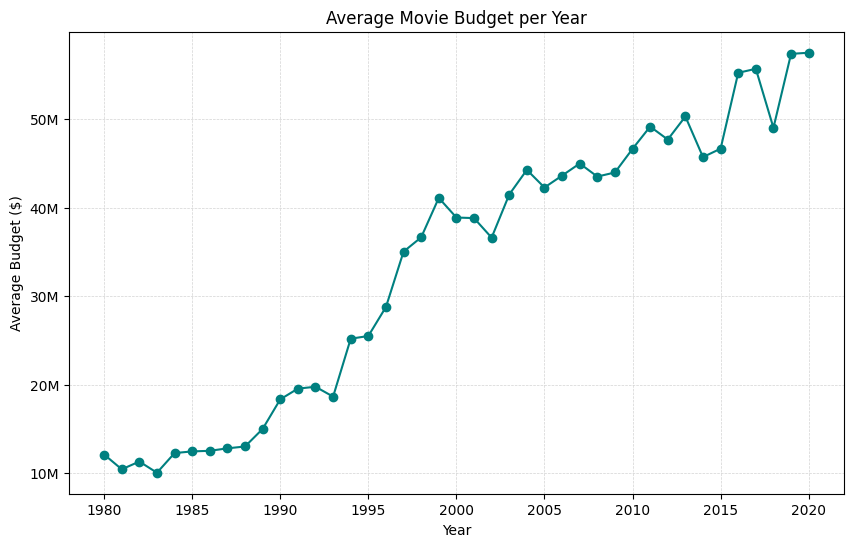

In [10]:
 ax = avg_budget_per_year.plot(
     x="year",
     y="budget",
     kind="line",
     figsize=(10, 6),
     marker="o",
     color="teal",
     legend=False
    )

# Format y-axis in millions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1_000_000)}M'))

plt.xlabel("Year")
plt.ylabel("Average Budget ($)")
plt.title("Average Movie Budget per Year")
plt.grid(color="lightgrey", linestyle="--", linewidth=0.5)
plt.show()

## Is there a trend in movie runtimes over time (are movies getting longer or shorter)?

In [11]:
avg_movie_runtimes = (
    data.groupby("year")["runtime"]
    .mean()
    .reset_index()
    .sort_values("year")
)

print("Averege Movie Runtimes Over the Years:")
print(avg_movie_runtimes)

Averege Movie Runtimes Over the Years:
    year     runtime
0   1980  107.402174
1   1981  105.955752
2   1982  105.928571
3   1983  102.270833
4   1984  104.446429
5   1985  102.235000
6   1986  101.805000
7   1987  102.710000
8   1988  103.585000
9   1989  102.710000
10  1990  104.925000
11  1991  106.315000
12  1992  106.690000
13  1993  107.525000
14  1994  105.570000
15  1995  106.725000
16  1996  107.240000
17  1997  107.260000
18  1998  107.365000
19  1999  109.390000
20  2000  107.850000
21  2001  108.070000
22  2002  105.925000
23  2003  108.925000
24  2004  109.300000
25  2005  108.280000
26  2006  108.660000
27  2007  107.865000
28  2008  106.665000
29  2009  107.115000
30  2010  107.621212
31  2011  107.350000
32  2012  107.673367
33  2013  110.610000
34  2014  110.160000
35  2015  110.535000
36  2016  111.150000
37  2017  111.520000
38  2018  111.500000
39  2019  112.555000
40  2020  109.375000


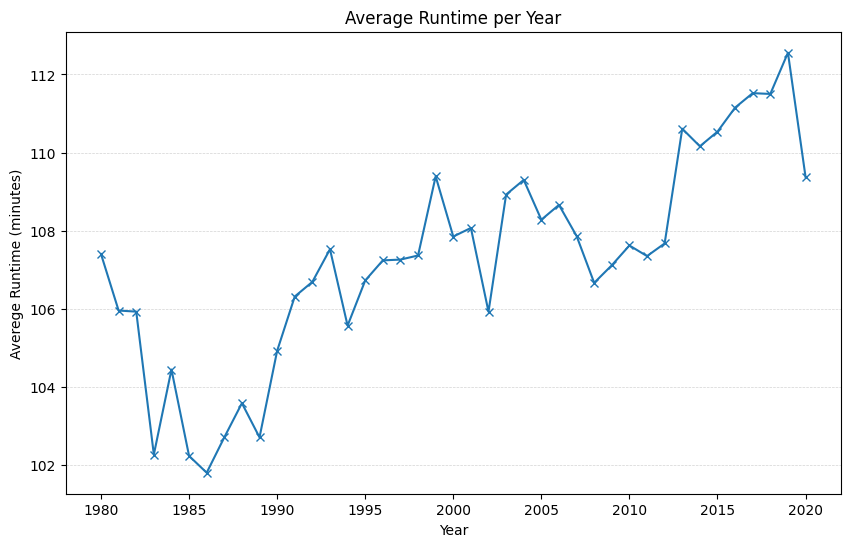

In [12]:
avg_movie_runtimes.plot(
    x="year",
    y="runtime",
    kind="line",
    marker="x",
    figsize=(10, 6),
    legend=False
)

plt.xlabel("Year")
plt.ylabel("Averege Runtime (minutes)")
plt.title("Average Runtime per Year")

plt.grid(axis="y", linestyle="--", linewidth=0.5, color="lightgrey")
plt.show()

## How have ratings (G, PG, PG-13, R) evolved in frequency over decades?

Ratings frequency by decade:
rating  Approved   G  NC-17  Not Rated   PG  PG-13     R  TV-14  TV-MA  TV-PG  \
decade                                                                          
1980           1  38      3         27  480    237   830      0      0      1   
1990           0  59     11         51  304    496  1039      0      2      1   
2000           0  44      6         67  241    709   901      0      3      1   
2010           0  12      3        136  223    667   921      1      4      1   
2020           0   0      0          2    4      3     6      0      0      1   

rating  Unrated  X  
decade              
1980          7  3  
1990         20  0  
2000         16  0  
2010          9  0  
2020          0  0  


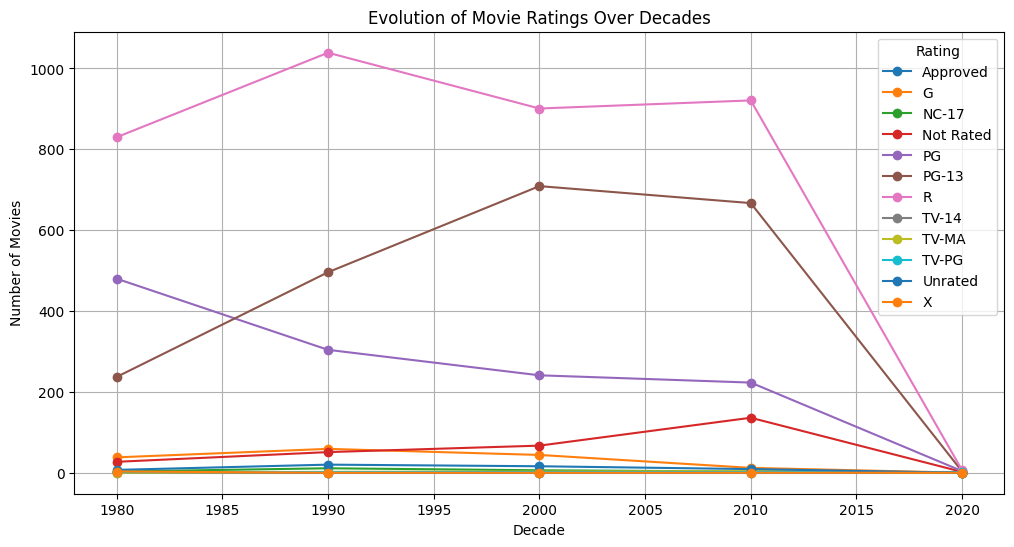

In [13]:
data["decade"] = (data["year"] // 10) * 10   # e.g., 1994 → 1990, 2003 → 2000

# Group by decade and rating, then count number of movies
rating_trend = data.groupby(["decade", "rating"]).size().unstack(fill_value=0)

print("Ratings frequency by decade:")
print(rating_trend)

# Plot evolution
rating_trend.plot(kind="line", marker="o", figsize=(12,6))

plt.title("Evolution of Movie Ratings Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")

plt.legend(title="Rating")
plt.grid(True)

plt.show()

# 🔍 Comparisons

## Do movies with higher budgets generally achieve higher gross?

In [14]:
print(data[["budget", "gross"]])

          budget        gross
0     19000000.0   46998772.0
1      4500000.0   58853106.0
2     18000000.0  538375067.0
3      3500000.0   83453539.0
4      6000000.0   39846344.0
...          ...          ...
7663      7000.0          NaN
7664         NaN          NaN
7665     58750.0          NaN
7666     15000.0          NaN
7667         NaN          NaN

[7668 rows x 2 columns]


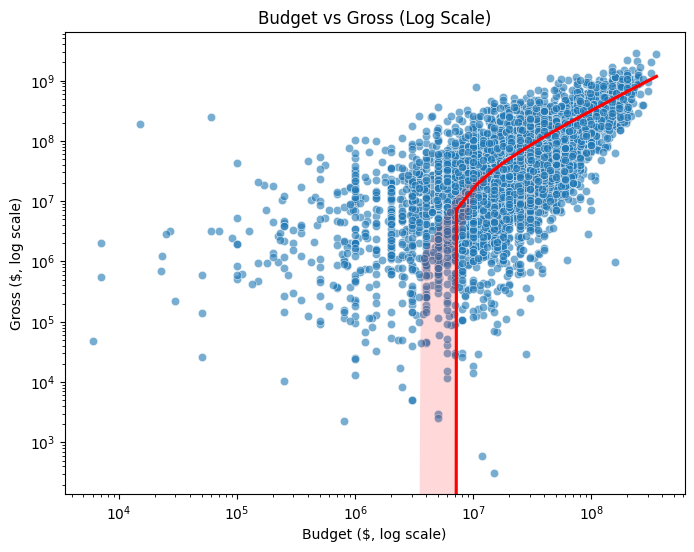

Correlation between budget and gross: 0.74


In [15]:
# Scatter plot with log scale
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="budget", y="gross", alpha=0.6)

# Add regression line
sns.regplot(data=data, x="budget", y="gross", scatter=False, color="red")

# Log scale for both axes
plt.xscale("log")
plt.yscale("log")

plt.title("Budget vs Gross (Log Scale)")
plt.xlabel("Budget ($, log scale)")
plt.ylabel("Gross ($, log scale)")
plt.show()

# Correlation
corr = data["budget"].corr(data["gross"])
print(f"Correlation between budget and gross: {corr:.2f}")


- Scatterplot: each movie = a dot, budget vs gross
- Red line: regression line showing trend
- Correlation coefficient:
    - Close to 1 -> strong positive correlation (higher budget -> higher gross)
    - Close to 0 -> little/no relationship
    - Close to -1 -> strong negative correlation

## Are certain genres more likely to get higher scores or more votes?

In [16]:
print(data[["genre", "score", "votes"]])

          genre  score      votes
0         Drama    8.4   927000.0
1     Adventure    5.8    65000.0
2        Action    8.7  1200000.0
3        Comedy    7.7   221000.0
4        Comedy    7.3   108000.0
...         ...    ...        ...
7663      Drama    3.1       18.0
7664     Comedy    4.7       36.0
7665      Drama    5.7       29.0
7666      Drama    NaN        NaN
7667     Horror    5.7        7.0

[7668 rows x 3 columns]


In [17]:
print(data.groupby("genre")["score"].mean().sort_values())

genre
Western      5.666667
Horror       5.750621
Sport        5.900000
Thriller     5.912500
Fantasy      6.006818
Comedy       6.193987
Action       6.202817
Sci-Fi       6.210000
Adventure    6.291569
Family       6.363636
Romance      6.410000
Mystery      6.665000
Crime        6.671506
Drama        6.693668
Animation    6.769231
Biography    7.030926
Music        7.200000
Musical      8.050000
History      8.300000
Name: score, dtype: float64


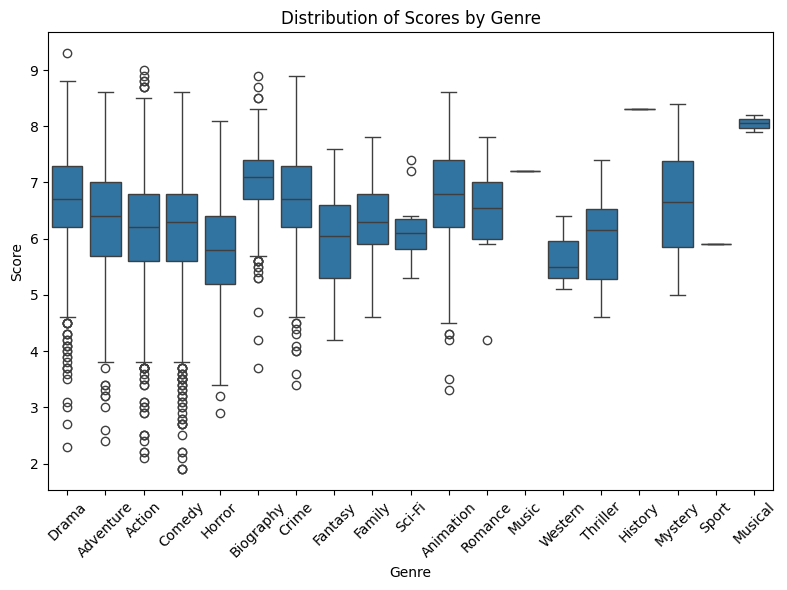

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="genre", y="score")

plt.xlabel("Genre")
plt.ylabel("Score")
plt.title("Distribution of Scores by Genre")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

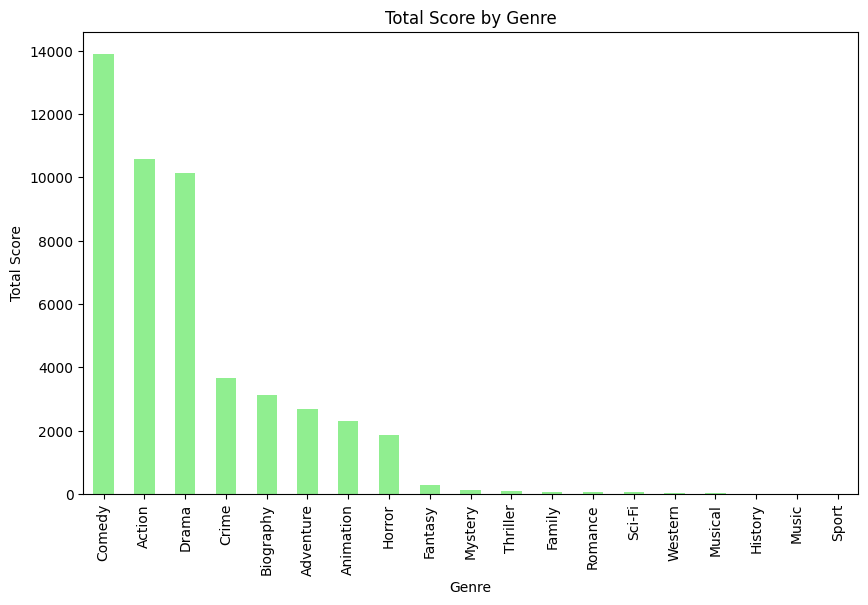

In [19]:
avg_scores = data.groupby("genre")["score"].sum().sort_values(ascending=False)

avg_scores.plot(kind="bar", figsize=(10, 6), color="lightgreen")

plt.xlabel("Genre")
plt.ylabel("Total Score")
plt.title("Total Score by Genre")

plt.show()

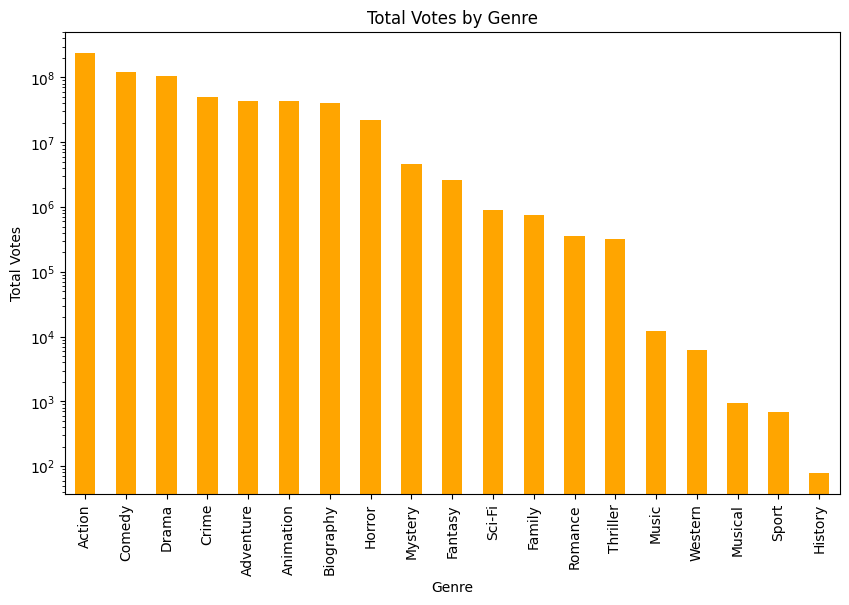

In [20]:
avg_scores = data.groupby("genre")["votes"].sum().sort_values(ascending=False)

avg_scores.plot(kind="bar", figsize=(10, 6), color="orange")

plt.yscale("log")

plt.xlabel("Genre")
plt.ylabel("Total Votes")
plt.title("Total Votes by Genre")

plt.show()

## Do movies from the U.S. vs. other countries differ significantly in average gross?

In [21]:
print(data.groupby("country")["gross"].mean().sort_values(ascending=False))

country
Malta                             3.527941e+08
New Zealand                       2.647805e+08
China                             2.197357e+08
Finland                           1.691938e+08
United States                     8.991236e+07
United Arab Emirates              8.858613e+07
South Africa                      8.102684e+07
Lebanon                           6.441700e+07
United Kingdom                    6.134110e+07
Germany                           5.360854e+07
Japan                             4.826355e+07
Taiwan                            4.230084e+07
Hong Kong                         4.138072e+07
South Korea                       3.895068e+07
Spain                             3.769719e+07
Australia                         3.498732e+07
Canada                            3.319832e+07
France                            3.244076e+07
India                             2.713399e+07
Czech Republic                    2.158306e+07
Austria                           2.092008e+07
Chile

Average Gross:
origin
Non-US    4.930865e+07
US        8.991236e+07
Name: gross, dtype: float64


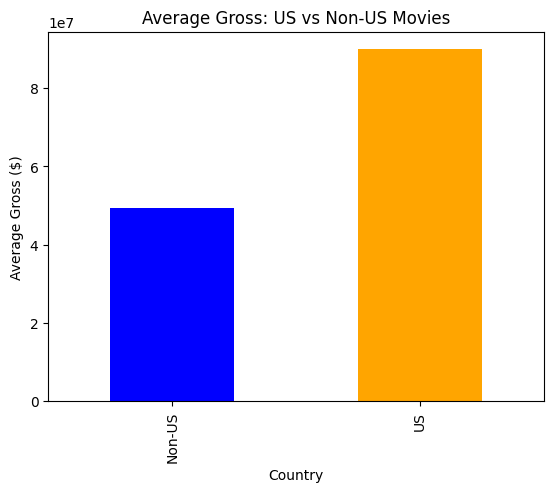

In [22]:
# Create US vs Non-US column
data["origin"] = data["country"].apply(lambda x: "US" if x == "United States" else "Non-US")

avg_gross = data.groupby("origin")["gross"].mean()
print("Average Gross:")
print(avg_gross)

avg_gross.plot(kind="bar", color=["blue", "orange"])

plt.title("Average Gross: US vs Non-US Movies")
plt.ylabel("Average Gross ($)")
plt.xlabel("Country")

plt.show()

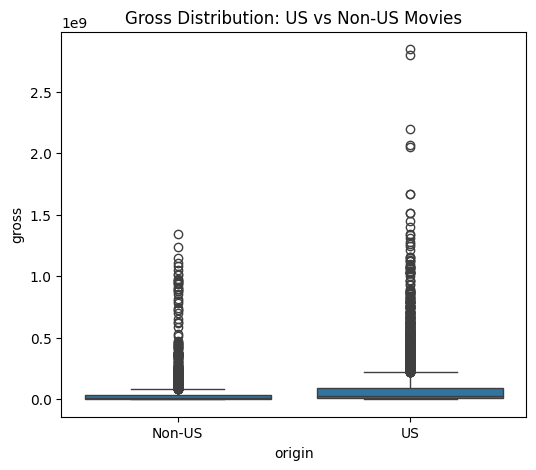

In [23]:
plt.figure(figsize=(6,5))
sns.boxplot(data=data, x="origin", y="gross")
plt.title("Gross Distribution: US vs Non-US Movies")
plt.show()

In [24]:
us_gross = data[data["origin"] == "US"]["gross"].dropna()
nonus_gross = data[data["origin"] == "Non-US"]["gross"].dropna()

tstat, pval = ttest_ind(us_gross, nonus_gross, equal_var=False)
print(f"T-test result: t={tstat:.2f}, p={pval:.6e}")

T-test result: t=10.98, p=9.602891e-28


1. T-statistic = 10.98
    - A very large positive t → the mean gross for U.S. movies is much higher than for Non-U.S. movies.
2. P-value = 9.6 × 10⁻²⁸
    - Way below the usual threshold of 0.05 or 0.01.
    - Practically zero probability that this difference is due to chance.

Conclusion: Movies from the U.S. gross significantly higher on average than movies from other countries, and the result is statistically overwhelming.

# 📊 Correlations

## Is there a correlation between movie score and gross earnings?

In [25]:
subset = data[["score", "gross"]].dropna()

# Pearson correlation
correlation = subset["score"].corr(subset["gross"])
print(f"Correlation between score and gross: {correlation:.3f}")

Correlation between score and gross: 0.186


`> 0` → higher scores = higher gross

`< 0` → higher scores = lower gross

`≈ 0` → no real relationship

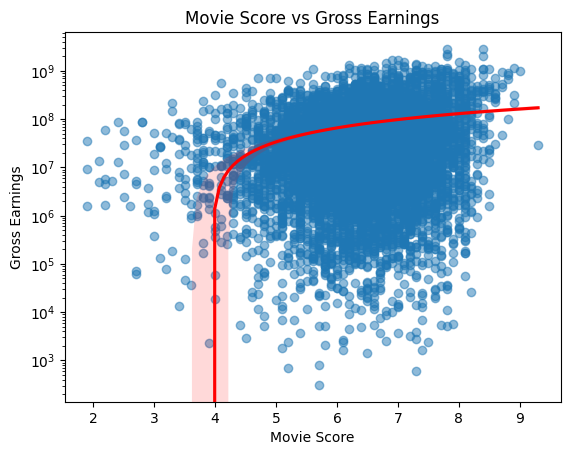

In [26]:
sns.regplot(x="score", y="gross", data=subset, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

plt.yscale("log")

plt.xlabel("Movie Score")
plt.ylabel("Gross Earnings")
plt.title("Movie Score vs Gross Earnings")

plt.show()

- If correlation is close to 0 → Movie score doesn’t strongly determine box office success.
- If moderately positive (e.g., 0.3–0.5) → higher-rated movies tend to gross more, but not always.

## Is the number of votes strongly correlated with the movie’s score?

Correlation between score and gross: 0.409


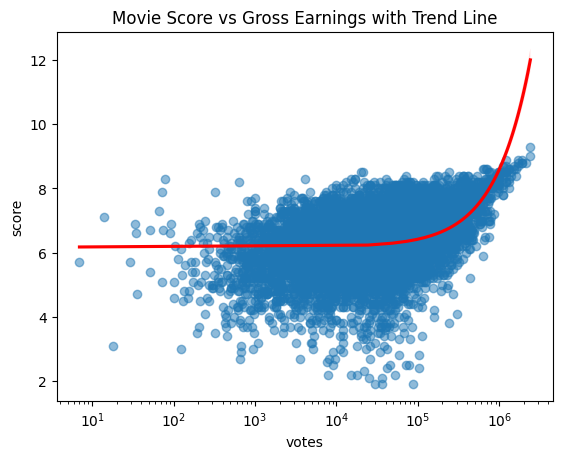

In [27]:
subset = data[["votes", "score"]].dropna()

# Pearson correlation
correlation = subset["votes"].corr(subset["score"])
print(f"Correlation between score and gross: {correlation:.3f}")

sns.regplot(x="votes", y="score", data=subset, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

plt.xscale("log")

plt.title("Movie Score vs Gross Earnings with Trend Line")

plt.show()

- If correlation is close to 0 → Movie score doesn’t strongly determine box office success.
- If moderately positive (e.g., 0.3–0.5) → higher-rated movies tend to gross more, but not always.

## Does runtime influence audience score or gross?

Correlation (Runtime vs Score): 0.397
Correlation (Runtime vs Gross): 0.245


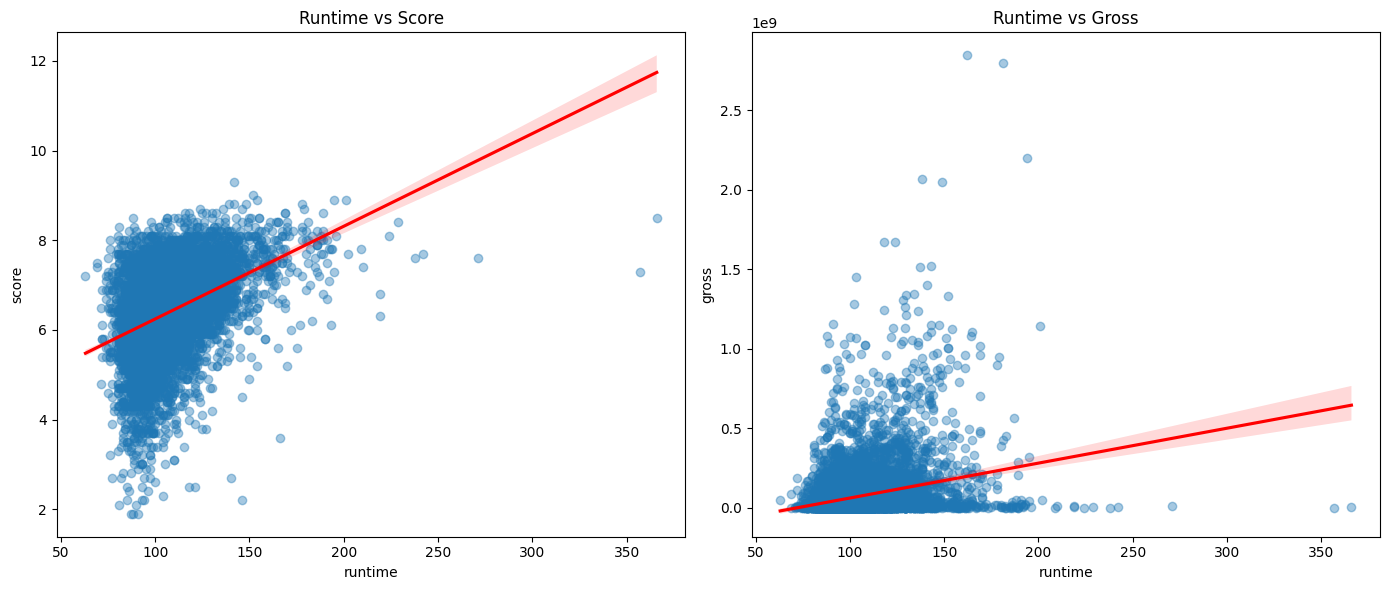

In [28]:
# Drop missing values
subset = data[["runtime", "score", "gross"]].dropna()

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Correlation values
corr_runtime_score = subset["runtime"].corr(subset["score"])
corr_runtime_gross = subset["runtime"].corr(subset["gross"])

print(f"Correlation (Runtime vs Score): {corr_runtime_score:.3f}")
print(f"Correlation (Runtime vs Gross): {corr_runtime_gross:.3f}")

# Runtime vs Score
sns.regplot(
    x="runtime", y="score", data=subset,
    scatter_kws={"alpha":0.4}, line_kws={"color":"red"},
    ax=axes[0]
)
axes[0].set_title("Runtime vs Score")

# Runtime vs Gross
sns.regplot(
    x="runtime", y="gross", data=subset,
    scatter_kws={"alpha":0.4}, line_kws={"color":"red"},
    ax=axes[1]
)
axes[1].set_title("Runtime vs Gross")

plt.tight_layout()
plt.show()

Correlation Results
- Runtime vs Score = 0.397
    - That’s a moderate positive correlation.
    - Longer movies tend to get slightly higher audience scores.
    - It’s not super strong, but it’s noticeable.
- Runtime vs Gross = 0.245
    - That’s a weak positive correlation.
    - Longer movies make a bit more money on average, but the effect is smaller.

What this means
- Audiences may prefer movies with more depth (longer runtimes), which could lead to better scores.
- Big-budget blockbusters are often longer → explains the weak positive runtime–gross link.
- But neither correlation is close to 1.0, so runtime is not the main driver of score or gross.

# 🤖 Advanced (Predictive / Deeper Insights)

## Can we predict a movie’s gross using features like budget, votes, and score?

## Which production companies consistently produce the highest-grossing or highest-rated movies?

## What are the most common writer–director–star collaborations, and how successful are they?